# Wavelet Software

### Was provided by C. Torrence and G. Compo, and is available at URL: http://atoc.colorado.edu/research/wavelets/

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


variance =  0.5392375741582254
lag1 =  0.72 

Los valores j son:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56.] 

La escala es:  [ 0.5         0.54525387  0.59460356  0.64841978  0.70710678  0.77110541
  0.84089642  0.91700404  1.          1.09050773  1.18920712  1.29683955
  1.41421356  1.54221083  1.68179283  1.83400809  2.          2.18101547
  2.37841423  2.59367911  2.82842712  3.08442165  3.36358566  3.66801617
  4.          4.36203093  4.75682846  5.18735822  5.65685425  6.1688433
  6.72717132  7.33603235  8.          8.72406186  9.51365692 10.37471644
 11.3137085  12.3376866  13.45434264 14.67206469 16.         17.44812372
 19.02731384 20.74943287 22.627417   24.67537321 26.90868529 29.34412938
 32.         34.89624745 38.05462768 41.49886575 45.254834   49.35074641
 53.81737058 58.68825877 64.

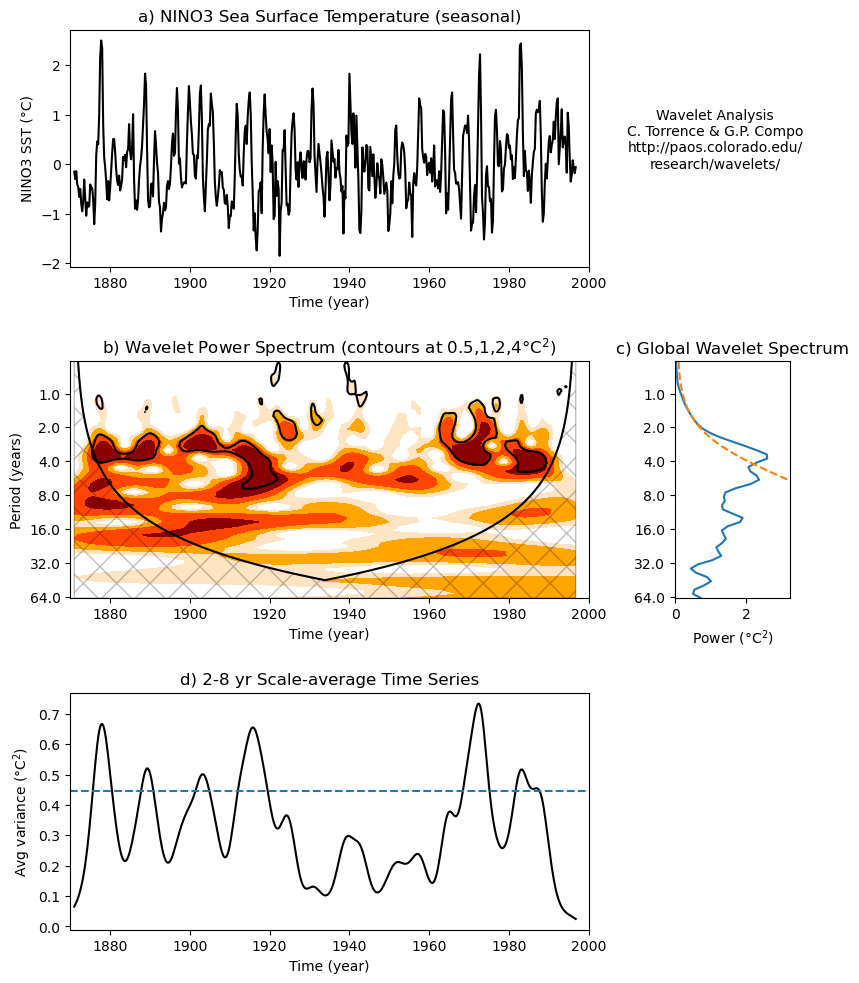

In [1]:
import waveletAnalysis
from waveletFunctions import wave_signif, wavelet

# Corriendo sobre datos de Auger (sin ajuste de escala)

In [2]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
# from mpl_toolkits.axes_grid1 import make_axes_locatable

from waveletFunctions import wave_signif, wavelet

import sys


sys.path.append('../augerscalerpy')
from scaler_cleaning import scaler_clean, plot_data

In [3]:
# READ THE DATA
#sst = np.loadtxt('sst_nino3.dat')  # input SST time series
dataset = scaler_clean('../scaler_datasets/scaler_300s_FINAL.csv','scaler_300s_N9')
#sst.set_index('Date', inplace=True) # Establece la columna 'Date' como el índice del DataFrame

Hay  (13663, 6) líneas vacías


/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/wave_python/../augerscalerpy/scaler_cleaning.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDOK["Date"] = datetime.values


In [38]:
sstA = np.loadtxt('sst_nino3.dat')  # input SST time series
len(sstA)

504

In [39]:
subset = dataset['ScalerCorr'].iloc[:504]
#subset['ScalerCorr'] = subset['ScalerCorr'].apply(lambda x: x[0])  # Extrae el primer valor de cada lista
#dataset = pd.DataFrame({'ScalerCorr': subset})
#sst= dataset.values.tolist()
#sst = np.array(subset)
sst = subset.values

In [41]:
sst = sst - np.mean(sst)
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

variance =  94.71108031769698


In [42]:
if 0:
    variance = 1.0
    sst = sst / np.std(sst, ddof=1)
n = len(sst)
dt = 0.25
time = np.arange(len(sst)) * dt + 1871.0  # construct time array
xlim = ([1870, 2000])  # plotting range
pad = 1  # pad the time series with zeroes (recommended)
dj = 0.25  # this will do 4 sub-octaves per octave
s0 = 2 * dt  # this says start at a scale of 6 months
j1 = 7 / dj  # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72  # lag-1 autocorrelation for red noise background
print("lag1 = ", lag1)
mother = 'MORLET'

lag1 =  0.72


In [43]:
sst.shape

(504,)

In [44]:
# Wavelet transform:
wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
global_ws = (np.sum(power, axis=1) / n)  # time-average over all times


In [45]:

# Significance levels:
signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
    lag1=lag1, mother=mother)
# expand signif --> (J+1)x(N) array
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
sig95 = power / sig95  # where ratio > 1, power is significant

# Global wavelet spectrum & significance levels:
dof = n - scale  # the -scale corrects for padding at edges
global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
    lag1=lag1, dof=dof, mother=mother)

# Scale-average between El Nino periods of 2--8 years
avg = np.logical_and(scale >= 2, scale < 8)
Cdelta = 0.776  # this is for the MORLET wavelet
# expand scale --> (J+1)x(N) array
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
scale_avg = power / scale_avg  # [Eqn(24)]
scale_avg = dj * dt / Cdelta * sum(scale_avg[avg, :])  # [Eqn(24)]
scaleavg_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=2,
    lag1=lag1, dof=([2, 7.9]), mother=mother)

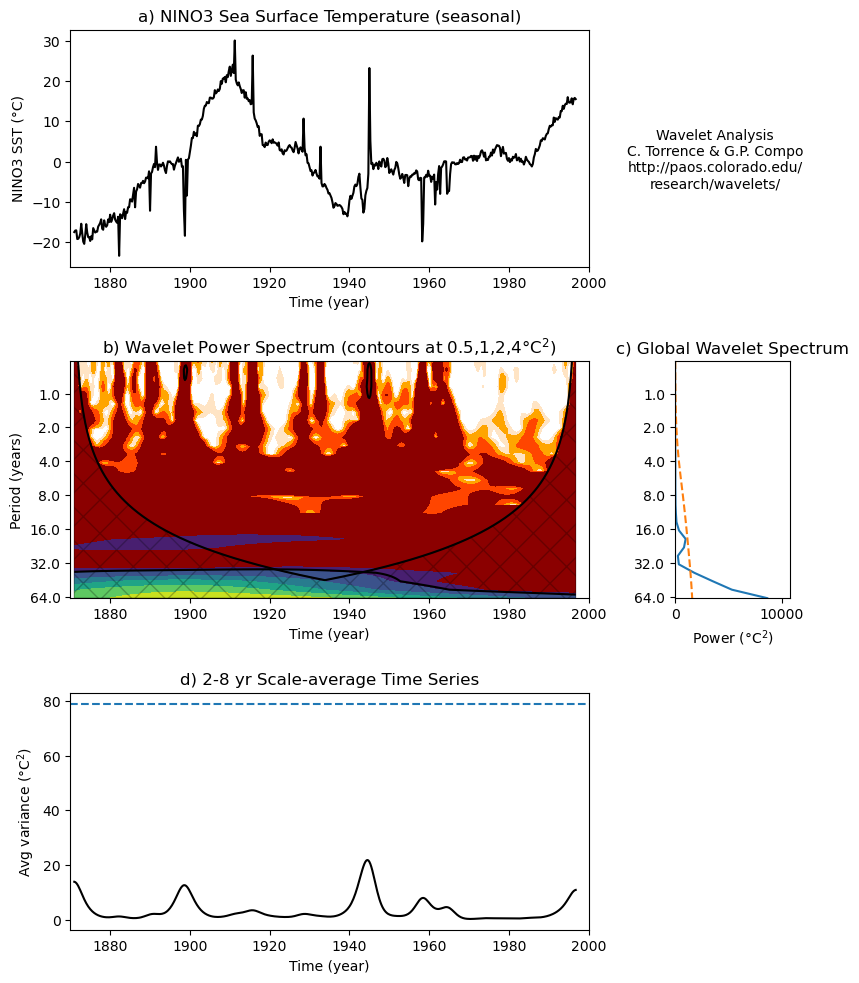

In [46]:
# ------------------------------------------------------ Plotting

# --- Plot time series
fig = plt.figure(figsize=(9, 10))
gs = GridSpec(3, 4, hspace=0.4, wspace=0.75)
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95,
                    wspace=0, hspace=0)
plt.subplot(gs[0, 0:3])
plt.plot(time, sst, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('NINO3 SST (\u00B0C)')
plt.title('a) NINO3 Sea Surface Temperature (seasonal)')

plt.text(time[-1] + 35, 0.5, 'Wavelet Analysis\nC. Torrence & G.P. Compo\n'
    'http://paos.colorado.edu/\nresearch/wavelets/',
    horizontalalignment='center', verticalalignment='center')

# --- Contour plot wavelet power spectrum
# plt3 = plt.subplot(3, 1, 2)
plt3 = plt.subplot(gs[1, 0:3])
levels = [0, 0.5, 1, 2, 4, 999]
# *** or use 'contour'
CS = plt.contourf(time, period, power, len(levels))
im = plt.contourf(CS, levels=levels,
    colors=['white', 'bisque', 'orange', 'orangered', 'darkred'])
plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
plt.title('b) Wavelet Power Spectrum (contours at 0.5,1,2,4\u00B0C$^2$)')
plt.xlim(xlim[:])
# 95# significance contour, levels at -99 (fake) and 1 (95# signif)
plt.contour(time, period, sig95, [-99, 1], colors='k')
# cone-of-influence, anything "below" is dubious
plt.fill_between(time, coi * 0 + period[-1], coi, facecolor="none",
    edgecolor="#00000040", hatch='x')
plt.plot(time, coi, 'k')
# format y-scale
plt3.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt3.ticklabel_format(axis='y', style='plain')
plt3.invert_yaxis()
# set up the size and location of the colorbar
# position=fig.add_axes([0.5,0.36,0.2,0.01])
# plt.colorbar(im, cax=position, orientation='horizontal')
#   , fraction=0.05, pad=0.5)

# plt.subplots_adjust(right=0.7, top=0.9)

# --- Plot global wavelet spectrum
plt4 = plt.subplot(gs[1, -1])
plt.plot(global_ws, period)
plt.plot(global_signif, period, '--')
plt.xlabel('Power (\u00B0C$^2$)')
plt.title('c) Global Wavelet Spectrum')
plt.xlim([0, 1.25 * np.max(global_ws)])
# format y-scale
plt4.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt4.ticklabel_format(axis='y', style='plain')
plt4.invert_yaxis()

# --- Plot 2--8 yr scale-average time series
plt.subplot(gs[2, 0:3])
plt.plot(time, scale_avg, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('Avg variance (\u00B0C$^2$)')
plt.title('d) 2-8 yr Scale-average Time Series')
plt.plot(xlim, scaleavg_signif + [0, 0], '--')

plt.show()

# Sobre los datos de Oulu (replicación de los resultados del paper)

In [4]:
CRIdf = pd.read_csv('../nm_data/CRI_auger-NMs.csv')


In [19]:
CRIdf = pd.read_csv('../solar_parameters/OULU_2006_01_01 _00_00_2021_09_30 _00_00.csv')
CRIdf['CorrectedCountRate[cts/min]'] = pd.to_numeric(CRIdf['CorrectedCountRate[cts/min]'], errors='coerce')
CRIdf['Timestamp'] = pd.to_datetime(CRIdf['Timestamp'])
mean_value = CRIdf['CorrectedCountRate[cts/min]'].mean()
CRIdf['CorrectedCountRate[cts/min]'].fillna(mean_value, inplace=True)
threshold_above = 1.08 * mean_value  # % por encima del valor promedio
threshold_below = 0.85 * mean_value  # % por debajo del valor promedio
mask_above = CRIdf['CorrectedCountRate[cts/min]'] > threshold_above
mask_below = CRIdf['CorrectedCountRate[cts/min]'] < threshold_below
CRIdf.loc[mask_above, 'CorrectedCountRate[cts/min]'] = mean_value
CRIdf.loc[mask_below, 'CorrectedCountRate[cts/min]'] = mean_value


/tmp/ipykernel_42725/1587243397.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6518.433627485075' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  CRIdf.loc[mask_above, 'CorrectedCountRate[cts/min]'] = mean_value


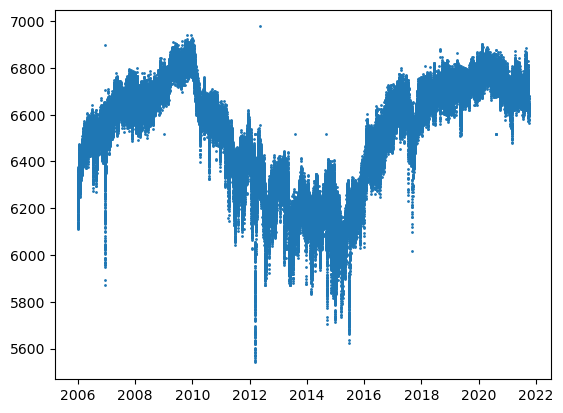

In [20]:
x = CRIdf['Timestamp'].values
y = CRIdf['CorrectedCountRate[cts/min]'].values
plt.scatter(x,y,s=1)

In [21]:
CRIdf.set_index('Timestamp', inplace=True)
CRIdf = CRIdf.resample('D').mean()

In [22]:
##### DEBO CONVERTIR ESA COLUMNA EN UN ARRAY DE NUMPY PARA PODER PASARLA POR EL CÓDIGO
#subset = CRIdf['counts/s'].iloc[:730]
subset = CRIdf['CorrectedCountRate[cts/min]']
sst = subset.values
len(sst)

5751

In [10]:
type(sst), type(time)

(numpy.ndarray, numpy.ndarray)

In [23]:
sst = sst - np.mean(sst)
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

n = len(sst)
dt = 1 # en unidades de dias
#time = np.arange(len(sst) * dt + 2006.0)   # construct time array
time = np.arange(2006, 2006 + (len(sst)/365), (1))
xlim = ([2006, 2021])  # plotting range
pad = 0  # pad the time series with zeroes (recommended)
#dj = 0.25  # this will do 4 sub-octaves per octave
dj = -1 
s0 = 2 * dt  # this says start at a scale of 6 months
#j1 = 7 / dj  # this says do 7 powers-of-two with dj sub-octaves each
j1=-1
lag1 = 0.72  # lag-1 autocorrelation for red noise background
print("lag1 = ", lag1, "\n")
mother = 'MORLET'

variance =  52770.10576144386
lag1 =  0.72 



In [119]:
time = np.arange(2006, 2006 + (len(sst)/365), (1/365))
time

array([2006.        , 2006.00273973, 2006.00547945, ..., 2021.74794521,
       2021.75068493, 2021.75342466])

In [24]:
####################### CALCULOSSSSSSSSSSS
# Wavelet transform:
#wave, period, scale, coi = wavelet(sst, dt,pad=0, dj=-1, s0=-1, J1=-1, mother=-1, param=-1, freq=None)
wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
#wave, period, scale, coi = wavelet(sst, dt, pad=0, dj, s0, j1, mother)
power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
global_ws = (np.sum(power, axis=1) / n)  # time-average over all times
print("La escala es: ", scale, " y el tamaño es de: ", len(scale), "\n", "El periodo es: ", period, "\n")

# Significance levels:
signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
    lag1=lag1, mother=mother)
# expand signif --> (J+1)x(N) array
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
sig95 = power / sig95  # where ratio > 1, power is significant

# Global wavelet spectrum & significance levels:
dof = n - scale  # the -scale corrects for padding at edges
global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
    lag1=lag1, dof=dof, mother=mother)

# Scale-average between El Nino periods of 2--8 years
avg = np.logical_and(scale >= 0.05, scale < 0.2)
Cdelta = 0.776  # this is for the MORLET wavelet
# expand scale --> (J+1)x(N) array
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
scale_avg = power / scale_avg  # [Eqn(24)]
scale_avg = dj * dt / Cdelta * sum(scale_avg[avg, :])  # [Eqn(24)]
scaleavg_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=2,
    lag1=lag1, dof=([0.05, 0.2]), mother=mother)

El valor de J1 es:  45.0 

Los valores j son:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.] 

La escala es:  [2.00000000e+00 2.37841423e+00 2.82842712e+00 3.36358566e+00
 4.00000000e+00 4.75682846e+00 5.65685425e+00 6.72717132e+00
 8.00000000e+00 9.51365692e+00 1.13137085e+01 1.34543426e+01
 1.60000000e+01 1.90273138e+01 2.26274170e+01 2.69086853e+01
 3.20000000e+01 3.80546277e+01 4.52548340e+01 5.38173706e+01
 6.40000000e+01 7.61092554e+01 9.05096680e+01 1.07634741e+02
 1.28000000e+02 1.52218511e+02 1.81019336e+02 2.15269482e+02
 2.56000000e+02 3.04437021e+02 3.62038672e+02 4.30538965e+02
 5.12000000e+02 6.08874043e+02 7.24077344e+02 8.61077929e+02
 1.02400000e+03 1.21774809e+03 1.44815469e+03 1.72215586e+03
 2.04800000e+03 2.43549617e+03 2.89630938e+03 3.44431172e+03
 4.09600000e+03 4.87099234e+03]  y el tamaño es de:  46 
 El periodo es:  [2.

In [92]:
time

array([2006.        , 2006.00273973, 2006.00547945, ..., 2384.14246575,
       2384.14520547, 2384.1479452 ])

ValueError: x and y must be the same size

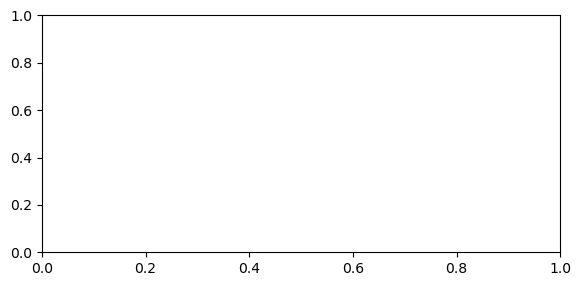

In [25]:
# ------------------------------------------------------ Plotting

# --- Plot time series
fig = plt.figure(figsize=(9, 10))
gs = GridSpec(3, 4, hspace=0.4, wspace=0.75)
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95,
                    wspace=0, hspace=0)
plt.subplot(gs[0, 0:3])
plt.scatter(time, sst, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('CRI')
plt.title('a) CRI OULU')

#plt.text(time[-1] + 35, 0.5, 'Wavelet Analysis\nC. Torrence & G.P. Compo\n'
#    'http://paos.colorado.edu/\nresearch/wavelets/',
#    horizontalalignment='center', verticalalignment='center')

# --- Contour plot wavelet power spectrum
# plt3 = plt.subplot(3, 1, 2)
plt3 = plt.subplot(gs[1, 0:3])
levels = [0, 0.5, 1, 2, 4, 999]
# *** or use 'contour'
CS = plt.contourf(time, period, power, len(levels))
im = plt.contourf(CS, levels=levels,
    colors=['white', 'bisque', 'orange', 'orangered', 'darkred'])
plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
plt.title('b) Wavelet Power Spectrum (contours at 0.5,1,2,4\u00B0C$^2$)')
plt.xlim(xlim[:])
# 95# significance contour, levels at -99 (fake) and 1 (95# signif)
plt.contour(time, period, sig95, [-99, 1], colors='k')
# cone-of-influence, anything "below" is dubious
plt.fill_between(time, coi * 0 + period[-1], coi, facecolor="none",
    edgecolor="#00000040", hatch='x')
plt.plot(time, coi, 'k')
# format y-scale
plt3.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt3.ticklabel_format(axis='y', style='plain')
plt3.invert_yaxis()
# set up the size and location of the colorbar
# position=fig.add_axes([0.5,0.36,0.2,0.01])
# plt.colorbar(im, cax=position, orientation='horizontal')
#   , fraction=0.05, pad=0.5)

# plt.subplots_adjust(right=0.7, top=0.9)

# --- Plot global wavelet spectrum
plt4 = plt.subplot(gs[1, -1])
plt.plot(global_ws, period)
plt.plot(global_signif, period, '--')
plt.xlabel('Power (\u00B0C$^2$)')
plt.title('c) Global Wavelet Spectrum')
plt.xlim([0, 1.25 * np.max(global_ws)])
# format y-scale
plt4.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt4.ticklabel_format(axis='y', style='plain')
plt4.invert_yaxis()

# --- Plot 2--8 yr scale-average time series
plt.subplot(gs[2, 0:3])
plt.plot(time, scale_avg, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('Avg variance (\u00B0C$^2$)')
plt.title('d) 2-8 yr Scale-average Time Series')
plt.plot(xlim, scaleavg_signif + [0, 0], '--')

plt.savefig('prueba4.png')
plt.show()